In [3]:
import numpy as np
import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import scipy.stats as stat

In [4]:
tf_specificity = pd.read_csv("helperdata/TF_specificity.csv").set_index("Gene")
tf_specificity.head()

,Unnamed: 0,Ensembl,RNA tissue specificity,RNA tissue distribution,RNA tissue specificity score,RNA tissue specific nTPM,RNA single cell type specificity,RNA single cell type distribution,RNA single cell type specificity score,RNA single cell type specific nTPM,RNA single nuclei brain specificity,RNA single nuclei brain distribution,RNA single nuclei brain specificity score,RNA single nuclei brain specific nTPM,TAU score - Tissue,TAU score - Blood,TAU score - Brain,TAU score - Single Cell Type,TAU score - Single nuclei brain
Gene,,,,,,,,,,,,,,,,,,,
TFAP2A,0,ENSG00000137203,Tissue enhanced,Detected in many,NaN,"{'breast': '31.9', 'skin 1': '64.9'}",Cell type enhanced,Detected in many,NaN,"{'Basal squamous epithelial cells': '158.0', '...",Cell type enriched,Detected in some,6.0,{'cerebellar inhibitory': '69.0'},0.70,Not detected,0.55,0.76,0.91
TFAP2B,0,ENSG00000008196,Tissue enhanced,Detected in some,NaN,"{'epididymis': '32.5', 'retina': '14.3'}",Group enriched,Detected in many,4.0,"{'Basal squamous epithelial cells': '92.0', 'H...",Cell type enriched,Detected in some,21.0,{'cerebellar inhibitory': '230.9'},0.85,Not detected,0.72,0.85,0.95
TFAP2C,0,ENSG00000087510,Tissue enhanced,Detected in many,NaN,"{'esophagus': '28.3', 'skin 1': '51.9'}",Cell type enhanced,Detected in many,NaN,"{'Basal keratinocytes': '95.0', 'Basal squamou...",Group enriched,Detected in some,4.0,"{'astrocyte': '3.4', 'endothelial cell': '6.0'...",0.67,Not detected,0.42,0.70,0.93
TFAP2D,0,ENSG00000008197,Not detected,Not detected,NaN,NaN,Cell type enhanced,Detected in some,NaN,"{'Horizontal cells': '2.5', 'Oocytes': '1.5'}",Cell type enhanced,Detected in some,NaN,"{'amygdala excitatory': '15.1', 'deep-layer in...",Not detected,Not detected,0.87,0.97,0.85
TFAP2E,0,ENSG00000116819,Tissue enriched,Detected in many,7.0,{'brain': '36.1'},Cell type enhanced,Detected in some,NaN,"{'Bipolar cells': '8.2', 'Excitatory neurons':...",Low cell type specificity,Detected in all,NaN,NaN,0.80,Not detected,0.32,0.79,0.25


In [5]:
tf_taus = tf_specificity.loc[:, ["TAU" in i for i in tf_specificity.columns.to_list()]]
tf_taus = tf_taus.applymap(lambda x: np.NaN if x == "Not detected" or x == "Not available" else float(x))
tf_taus.sort_values("TAU score - Single Cell Type", ascending=False)

/var/folders/rq/l7tf3_nx0ml2t2rb_tgxvm280000gn/T/ipykernel_56805/2159412513.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  tf_taus = tf_taus.applymap(lambda x: np.NaN if x == "Not detected" or x == "Not available" else float(x))


,TAU score - Tissue,TAU score - Blood,TAU score - Brain,TAU score - Single Cell Type,TAU score - Single nuclei brain
Gene,,,,,
RHOXF2B,0.99,NaN,NaN,1.0,NaN
LBX1,0.98,NaN,0.74,1.0,0.98
NOBOX,NaN,NaN,NaN,1.0,NaN
MYOG,0.93,NaN,0.57,1.0,NaN
FOXR2,0.99,NaN,NaN,1.0,NaN
...,...,...,...,...,...
HSFX1,0.52,NaN,0.22,NaN,NaN
HSFX2,0.79,NaN,0.32,NaN,NaN
HSFY1,0.96,NaN,NaN,NaN,NaN


## sCRNA clustering

In [6]:
tf_scrna = pd.read_csv("helperdata/TF_scRNA.csv").drop("Unnamed: 0", axis=1)
tf_scrna.head()

,Gene,Ensembl,Single Cell Type RNA - Adipocytes [nTPM],Single Cell Type RNA - Alveolar cells type 1 [nTPM],Single Cell Type RNA - Alveolar cells type 2 [nTPM],Single Cell Type RNA - Astrocytes [nTPM],Single Cell Type RNA - B-cells [nTPM],Single Cell Type RNA - Basal keratinocytes [nTPM],Single Cell Type RNA - Basal prostatic cells [nTPM],Single Cell Type RNA - Basal respiratory cells [nTPM],...,Single Cell Type RNA - Sertoli cells [nTPM],Single Cell Type RNA - Skeletal myocytes [nTPM],Single Cell Type RNA - Smooth muscle cells [nTPM],Single Cell Type RNA - Spermatocytes [nTPM],Single Cell Type RNA - Spermatogonia [nTPM],Single Cell Type RNA - Squamous epithelial cells [nTPM],Single Cell Type RNA - Suprabasal keratinocytes [nTPM],Single Cell Type RNA - Syncytiotrophoblasts [nTPM],Single Cell Type RNA - T-cells [nTPM],Single Cell Type RNA - Undifferentiated cells [nTPM]
0,TFAP2A,ENSG00000137203,1.7,0.2,0.3,0.0,0.1,106.0,63.2,46.0,...,0.0,0.0,4.9,7.8,16.4,139.1,115.4,700.8,1.1,1.1
1,TFAP2B,ENSG00000008196,0.5,0.0,0.0,0.0,0.2,7.4,0.6,0.1,...,0.0,0.0,2.3,1.4,0.7,23.1,2.4,4.1,0.1,0.0
2,TFAP2C,ENSG00000087510,1.3,3.5,10.6,3.7,0.7,95.0,22.0,2.6,...,0.0,0.0,5.8,0.2,1.6,70.5,92.4,107.6,1.0,1.6
3,TFAP2D,ENSG00000008197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0
4,TFAP2E,ENSG00000116819,0.2,0.2,0.5,4.6,0.2,2.0,0.0,0.2,...,0.0,0.0,0.4,2.2,0.2,0.4,2.8,0.3,0.5,0.2


In [7]:
tf_scrna_log = tf_scrna.drop("Ensembl", axis=1).set_index("Gene").applymap(lambda x: np.log(x) if x != 0 else x)
tf_scrna_log

/var/folders/rq/l7tf3_nx0ml2t2rb_tgxvm280000gn/T/ipykernel_56805/3388586198.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  tf_scrna_log = tf_scrna.drop("Ensembl", axis=1).set_index("Gene").applymap(lambda x: np.log(x) if x != 0 else x)


,Single Cell Type RNA - Adipocytes [nTPM],Single Cell Type RNA - Alveolar cells type 1 [nTPM],Single Cell Type RNA - Alveolar cells type 2 [nTPM],Single Cell Type RNA - Astrocytes [nTPM],Single Cell Type RNA - B-cells [nTPM],Single Cell Type RNA - Basal keratinocytes [nTPM],Single Cell Type RNA - Basal prostatic cells [nTPM],Single Cell Type RNA - Basal respiratory cells [nTPM],Single Cell Type RNA - Basal squamous epithelial cells [nTPM],Single Cell Type RNA - Bipolar cells [nTPM],...,Single Cell Type RNA - Sertoli cells [nTPM],Single Cell Type RNA - Skeletal myocytes [nTPM],Single Cell Type RNA - Smooth muscle cells [nTPM],Single Cell Type RNA - Spermatocytes [nTPM],Single Cell Type RNA - Spermatogonia [nTPM],Single Cell Type RNA - Squamous epithelial cells [nTPM],Single Cell Type RNA - Suprabasal keratinocytes [nTPM],Single Cell Type RNA - Syncytiotrophoblasts [nTPM],Single Cell Type RNA - T-cells [nTPM],Single Cell Type RNA - Undifferentiated cells [nTPM]
Gene,,,,,,,,,,,,,,,,,,,,,
TFAP2A,0.530628,-1.609438,-1.203973,0.000000,-2.302585,4.663439,4.146304,3.828641,5.062595,1.629241,...,0.000000,0.000000,1.589235,2.054124,2.797281,4.935193,4.748404,6.552223,0.095310,0.095310
TFAP2B,-0.693147,0.000000,0.000000,0.000000,-1.609438,2.001480,-0.510826,-2.302585,4.521789,3.471966,...,0.000000,0.000000,0.832909,0.336472,-0.356675,3.139833,0.875469,1.410987,-2.302585,0.000000
TFAP2C,0.262364,1.252763,2.360854,1.308333,-0.356675,4.553877,3.091042,0.955511,4.653960,0.000000,...,0.000000,0.000000,1.757858,-1.609438,0.470004,4.255613,4.526127,4.678421,0.000000,0.470004
TFAP2D,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-2.302585,0.000000,0.000000,0.000000,0.000000,0.000000
TFAP2E,-1.609438,-1.609438,-0.693147,1.526056,-1.609438,0.693147,0.000000,-1.609438,0.000000,2.104134,...,0.000000,0.000000,-0.916291,0.788457,-1.609438,-0.916291,1.029619,-1.203973,-0.693147,-1.609438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
THAP5,3.310543,3.222868,2.797281,2.197225,3.380995,2.572612,3.453157,2.091864,2.230014,3.696351,...,3.303217,3.306887,3.161247,3.668677,3.072693,2.066863,2.753661,2.681022,3.242592,2.646175
THAP6,2.332144,2.219203,2.312535,3.030134,2.879198,2.151762,2.476538,2.501436,2.667228,2.753661,...,1.686399,2.054124,2.631889,3.919991,2.827314,2.415914,2.128232,2.292535,2.906901,2.163323
THAP7,2.890372,3.254243,3.325036,1.774952,3.295837,2.873565,3.583519,3.210844,2.572612,3.086487,...,3.081910,3.234749,3.261935,5.173887,4.454347,2.809403,2.862201,3.471966,3.468856,3.246491


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1000x10000 with 0 Axes>

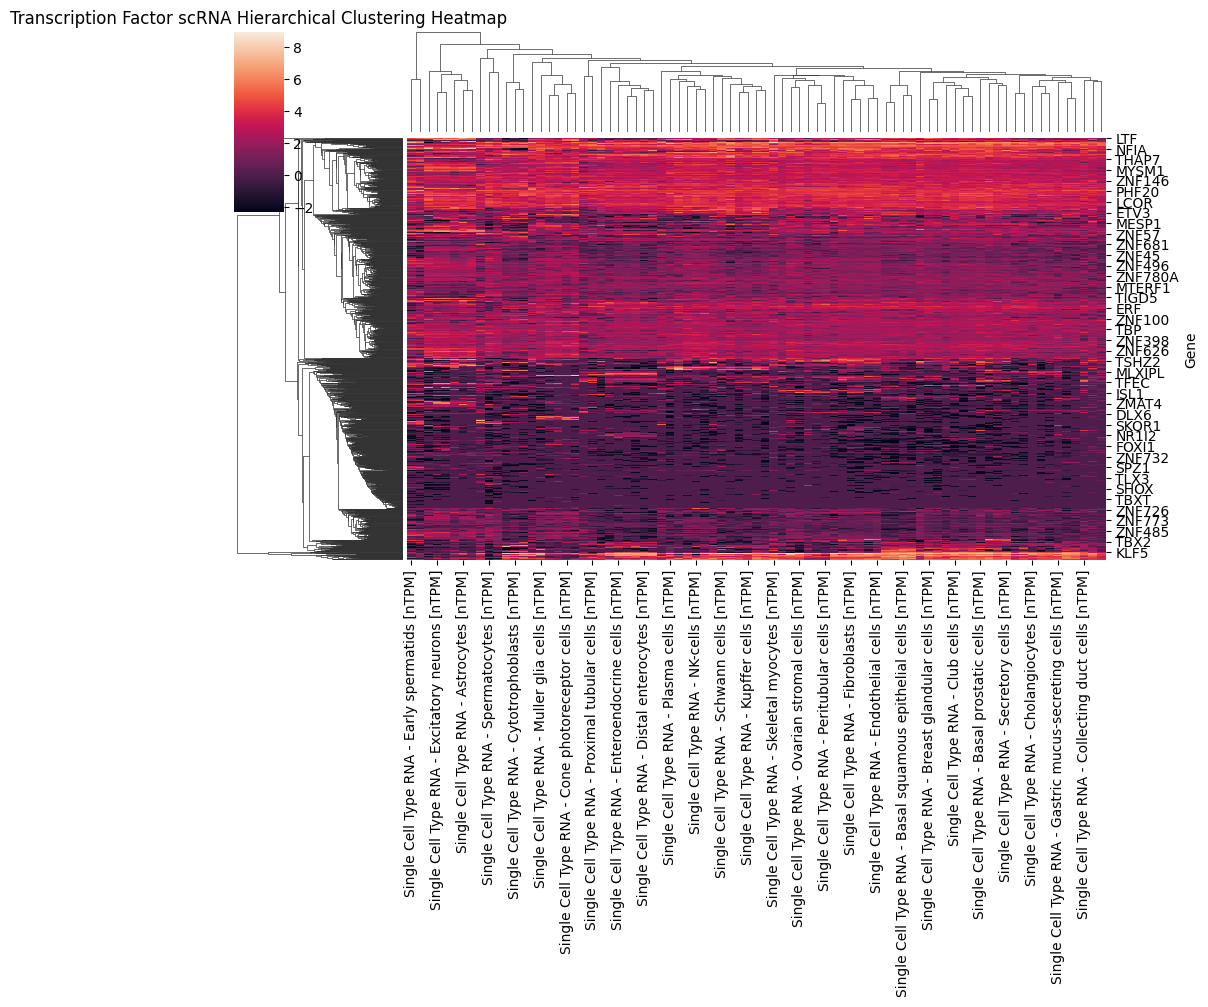

In [178]:
plt.figure(figsize=(10, 100))
sns.clustermap(tf_scrna_log)
plt.title("Transcription Factor scRNA Hierarchical Clustering Heatmap")
plt.savefig("figures/TFscRNAheatmap.png")

In [173]:
#Clustering
from sklearn.cluster import MeanShift
import numpy as np
meanshiftcluster = MeanShift().fit(tf_scrna_log)


from sklearn.cluster import AgglomerativeClustering
import numpy as np
wardclustering = AgglomerativeClustering(19).fit(tf_scrna_log)


from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_new = pca.fit_transform(tf_scrna_log)

In [174]:
#Make clustering DF
scRNA_clustered = tf_scrna_log[[]]
scRNA_clustered["PCA_1"] = X_new[:, 0]
scRNA_clustered["PCA_2"] = X_new[:, 1]

scRNA_clustered["Mean Shift Cluster"] = meanshiftcluster.labels_
scRNA_clustered["Agglomerative Cluster"] = wardclustering.labels_

/var/folders/rq/l7tf3_nx0ml2t2rb_tgxvm280000gn/T/ipykernel_56805/2121215677.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scRNA_clustered["PCA_1"] = X_new[:, 0]
/var/folders/rq/l7tf3_nx0ml2t2rb_tgxvm280000gn/T/ipykernel_56805/2121215677.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scRNA_clustered["PCA_2"] = X_new[:, 1]
/var/folders/rq/l7tf3_nx0ml2t2rb_tgxvm280000gn/T/ipykernel_56805/2121215677.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

<Axes: xlabel='PCA_1', ylabel='PCA_2'>

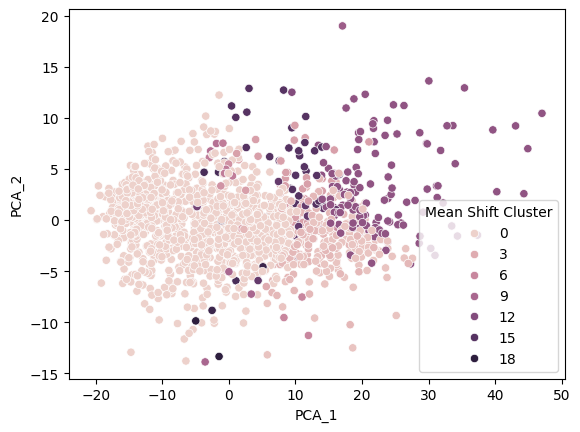

In [175]:
sns.scatterplot(scRNA_clustered, x = "PCA_1", y = "PCA_2", hue="Mean Shift Cluster")

<Axes: xlabel='PCA_1', ylabel='PCA_2'>

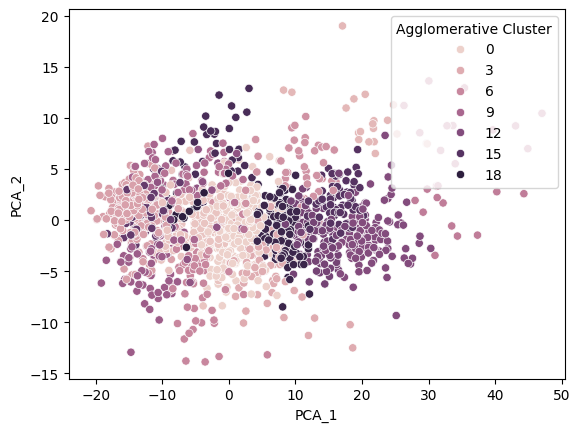

In [176]:
sns.scatterplot(scRNA_clustered, x = "PCA_1", y = "PCA_2", hue="Agglomerative Cluster")

In [177]:
%%script echo
for i in range(30):
    sns.heatmap(tf_scrna_log[scRNA_clustered["Agglomerative Cluster"] == i])
    plt.show()

In [14]:
TFsmapped = pd.read_csv("../TF_list/tfsmapped-gencodes.csv").drop("Unnamed: 0", axis=1)
TFsmapped_reviewed = TFsmapped[TFsmapped["Reviewed"] == "reviewed"]
print(len(TFsmapped_reviewed))
TFsmapped_reviewed.head()


1616


,From,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,Tissue specificity,Motif,Protein families,Compositional bias,Sequence similarities,Bgee,ExpressionAtlas,num ADs,num RDs,classification,gencodeId
0,ENSG00000137203,P05549,reviewed,AP2A_HUMAN,Transcription factor AP-2-alpha (AP2-alpha) (A...,TFAP2A AP2TF TFAP2,Homo sapiens (Human),437,NaN,"MOTIF 57..62; /note=""PPxY motif""",AP-2 family,"COMPBIAS 23..48; /note=""Polar residues""; /evid...",SIMILARITY: Belongs to the AP-2 family. {ECO:0...,ENSG00000137203; Expressed in upper leg skin a...,P05549; baseline and differential.;,1,0,AD only,ENSG00000137203.10
9,ENSG00000008196,Q92481,reviewed,AP2B_HUMAN,Transcription factor AP-2-beta (AP2-beta) (Act...,TFAP2B,Homo sapiens (Human),460,NaN,NaN,AP-2 family,"COMPBIAS 36..60; /note=""Polar residues""; /evid...",SIMILARITY: Belongs to the AP-2 family. {ECO:0...,ENSG00000008196; Expressed in corpus epididymi...,Q92481; baseline and differential.;,1,1,both,ENSG00000008196.12
11,ENSG00000087510,Q92754,reviewed,AP2C_HUMAN,Transcription factor AP-2 gamma (AP2-gamma) (A...,TFAP2C,Homo sapiens (Human),450,NaN,"MOTIF 59..64; /note=""PPxY motif""",AP-2 family,"COMPBIAS 92..107; /note=""Polar residues""; /evi...",SIMILARITY: Belongs to the AP-2 family. {ECO:0...,ENSG00000087510; Expressed in endometrium epit...,Q92754; baseline and differential.;,1,1,both,ENSG00000087510.6
13,ENSG00000008197,Q7Z6R9,reviewed,AP2D_HUMAN,Transcription factor AP-2-delta (AP2-delta) (A...,TFAP2D TFAP2BL1,Homo sapiens (Human),452,"TISSUE SPECIFICITY: Highly expressed in brain,...",NaN,AP-2 family,"COMPBIAS 433..452; /note=""Basic and acidic res...",SIMILARITY: Belongs to the AP-2 family. {ECO:0...,ENSG00000008197; Expressed in oocyte and 23 ot...,NaN,1,0,AD only,ENSG00000008197.4
14,ENSG00000116819,Q6VUC0,reviewed,AP2E_HUMAN,Transcription factor AP-2-epsilon (AP2-epsilon...,TFAP2E,Homo sapiens (Human),442,"TISSUE SPECIFICITY: Expressed in skin, primary...","MOTIF 54..59; /note=""PPxY motif""; /evidence=""E...",AP-2 family,NaN,SIMILARITY: Belongs to the AP-2 family. {ECO:0...,ENSG00000116819; Expressed in cerebellar hemis...,NaN,0,0,none,ENSG00000116819.6


In [15]:
scRNA_clustered_merged = scRNA_clustered.merge(tf_scrna[["Gene", "Ensembl"]].set_index("Ensembl").merge(TFsmapped_reviewed, left_index=True, right_on="From"), left_index=True, right_on="Gene")
scRNA_clustered_merged = scRNA_clustered_merged.merge(tf_taus, left_on="Gene", right_index=True)
scRNA_clustered_merged.head()

,PCA_1,PCA_2,Mean Shift Cluster,Agglomerative Cluster,Gene,From,Entry,Reviewed,Entry Name,Protein names,...,ExpressionAtlas,num ADs,num RDs,classification,gencodeId,TAU score - Tissue,TAU score - Blood,TAU score - Brain,TAU score - Single Cell Type,TAU score - Single nuclei brain
0,-0.687114,5.728896,16,1,TFAP2A,ENSG00000137203,P05549,reviewed,AP2A_HUMAN,Transcription factor AP-2-alpha (AP2-alpha) (A...,...,P05549; baseline and differential.;,1,0,AD only,ENSG00000137203.10,0.70,NaN,0.55,0.76,0.91
9,-7.623561,0.649320,0,28,TFAP2B,ENSG00000008196,Q92481,reviewed,AP2B_HUMAN,Transcription factor AP-2-beta (AP2-beta) (Act...,...,Q92481; baseline and differential.;,1,1,both,ENSG00000008196.12,0.85,NaN,0.72,0.85,0.95
11,-0.728695,6.624925,0,1,TFAP2C,ENSG00000087510,Q92754,reviewed,AP2C_HUMAN,Transcription factor AP-2 gamma (AP2-gamma) (A...,...,Q92754; baseline and differential.;,1,1,both,ENSG00000087510.6,0.67,NaN,0.42,0.70,0.93
13,-13.374526,4.461103,0,13,TFAP2D,ENSG00000008197,Q7Z6R9,reviewed,AP2D_HUMAN,Transcription factor AP-2-delta (AP2-delta) (A...,...,NaN,1,0,AD only,ENSG00000008197.4,NaN,NaN,0.87,0.97,0.85
14,-15.784383,-3.493791,0,4,TFAP2E,ENSG00000116819,Q6VUC0,reviewed,AP2E_HUMAN,Transcription factor AP-2-epsilon (AP2-epsilon...,...,NaN,0,0,none,ENSG00000116819.6,0.80,NaN,0.32,0.79,0.25


### Specificity and AD/RD

In [16]:
specificity_ADRD = tf_specificity.merge(TFsmapped_reviewed, left_on="Ensembl", right_on="From").drop("Unnamed: 0", axis=1)
specificity_ADRD.head()

,Ensembl,RNA tissue specificity,RNA tissue distribution,RNA tissue specificity score,RNA tissue specific nTPM,RNA single cell type specificity,RNA single cell type distribution,RNA single cell type specificity score,RNA single cell type specific nTPM,RNA single nuclei brain specificity,...,Motif,Protein families,Compositional bias,Sequence similarities,Bgee,ExpressionAtlas,num ADs,num RDs,classification,gencodeId
0,ENSG00000137203,Tissue enhanced,Detected in many,NaN,"{'breast': '31.9', 'skin 1': '64.9'}",Cell type enhanced,Detected in many,NaN,"{'Basal squamous epithelial cells': '158.0', '...",Cell type enriched,...,"MOTIF 57..62; /note=""PPxY motif""",AP-2 family,"COMPBIAS 23..48; /note=""Polar residues""; /evid...",SIMILARITY: Belongs to the AP-2 family. {ECO:0...,ENSG00000137203; Expressed in upper leg skin a...,P05549; baseline and differential.;,1,0,AD only,ENSG00000137203.10
1,ENSG00000008196,Tissue enhanced,Detected in some,NaN,"{'epididymis': '32.5', 'retina': '14.3'}",Group enriched,Detected in many,4.0,"{'Basal squamous epithelial cells': '92.0', 'H...",Cell type enriched,...,NaN,AP-2 family,"COMPBIAS 36..60; /note=""Polar residues""; /evid...",SIMILARITY: Belongs to the AP-2 family. {ECO:0...,ENSG00000008196; Expressed in corpus epididymi...,Q92481; baseline and differential.;,1,1,both,ENSG00000008196.12
2,ENSG00000087510,Tissue enhanced,Detected in many,NaN,"{'esophagus': '28.3', 'skin 1': '51.9'}",Cell type enhanced,Detected in many,NaN,"{'Basal keratinocytes': '95.0', 'Basal squamou...",Group enriched,...,"MOTIF 59..64; /note=""PPxY motif""",AP-2 family,"COMPBIAS 92..107; /note=""Polar residues""; /evi...",SIMILARITY: Belongs to the AP-2 family. {ECO:0...,ENSG00000087510; Expressed in endometrium epit...,Q92754; baseline and differential.;,1,1,both,ENSG00000087510.6
3,ENSG00000008197,Not detected,Not detected,NaN,NaN,Cell type enhanced,Detected in some,NaN,"{'Horizontal cells': '2.5', 'Oocytes': '1.5'}",Cell type enhanced,...,NaN,AP-2 family,"COMPBIAS 433..452; /note=""Basic and acidic res...",SIMILARITY: Belongs to the AP-2 family. {ECO:0...,ENSG00000008197; Expressed in oocyte and 23 ot...,NaN,1,0,AD only,ENSG00000008197.4
4,ENSG00000116819,Tissue enriched,Detected in many,7.0,{'brain': '36.1'},Cell type enhanced,Detected in some,NaN,"{'Bipolar cells': '8.2', 'Excitatory neurons':...",Low cell type specificity,...,"MOTIF 54..59; /note=""PPxY motif""; /evidence=""E...",AP-2 family,NaN,SIMILARITY: Belongs to the AP-2 family. {ECO:0...,ENSG00000116819; Expressed in cerebellar hemis...,NaN,0,0,none,ENSG00000116819.6


In [17]:
specificity_ADRD[["RNA single cell type specificity","num ADs", "num RDs"]].groupby("RNA single cell type specificity").agg(np.mean)

/var/folders/rq/l7tf3_nx0ml2t2rb_tgxvm280000gn/T/ipykernel_56805/2044583614.py:1: FutureWarning: The provided callable <function mean at 0x1098c51c0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'mean' instead.
  specificity_ADRD[["RNA single cell type specificity","num ADs", "num RDs"]].groupby("RNA single cell type specificity").agg(np.mean)


,num ADs,num RDs
RNA single cell type specificity,,
Cell type enhanced,0.429454,0.644696
Cell type enriched,0.513761,0.733945
Group enriched,0.374302,0.664804
Low cell type specificity,0.195584,0.583596
Not detected,0.175000,0.650000


In [18]:
specificity_ADRD_pivot = specificity_ADRD.pivot_table(columns="classification", index = "RNA single cell type specificity", values = "gencodeId", aggfunc="count", margins=True)
specificity_ADRD_pivot

classification,AD only,RD only,both,none,All
RNA single cell type specificity,,,,,
Cell type enhanced,53,376,250,292,971
Cell type enriched,7,42,38,22,109
Group enriched,12,77,42,48,179
Low cell type specificity,14,153,32,118,317
Not detected,2,21,5,12,40
All,88,669,367,492,1616


In [19]:
specificity_ADRD_no_marg = specificity_ADRD.pivot_table(columns="classification", index = "RNA single cell type specificity", values = "gencodeId", aggfunc="count")
specificity_ADRD_no_marg = specificity_ADRD_no_marg.div(specificity_ADRD_no_marg.sum(axis=1), axis=0)
specificity_ADRD_no_marg.head()

classification,AD only,RD only,both,none
RNA single cell type specificity,,,,
Cell type enhanced,0.054583,0.387230,0.257467,0.300721
Cell type enriched,0.064220,0.385321,0.348624,0.201835
Group enriched,0.067039,0.430168,0.234637,0.268156
Low cell type specificity,0.044164,0.482650,0.100946,0.372240
Not detected,0.050000,0.525000,0.125000,0.300000


In [20]:
#chi-square
f_expected = (specificity_ADRD["classification"].value_counts().sort_index()/len(specificity_ADRD)).to_list()

for i in range(len(specificity_ADRD_no_marg)):
    classification = specificity_ADRD_no_marg.index.to_list()[i]
    pval = stat.chisquare(specificity_ADRD_no_marg.loc[classification], f_expected)

    print(classification, pval)

Cell type enhanced Power_divergenceResult(statistic=0.005834601415022622, pvalue=0.9998816752644698)
Cell type enriched Power_divergenceResult(statistic=0.10334868331488734, pvalue=0.9914325629858064)
Group enriched Power_divergenceResult(statistic=0.008118068897748541, pvalue=0.999805938018446)
Low cell type specificity Power_divergenceResult(statistic=0.09850671719045041, pvalue=0.9920160194025706)
Not detected Power_divergenceResult(statistic=0.07610469028813675, pvalue=0.9945418939240924)


#### chi square for # ADs

In [21]:
specificity_ADRD_pivot = specificity_ADRD.pivot_table(columns="num ADs", index = "RNA single cell type specificity", values = "gencodeId", aggfunc="count", margins=True)
specificity_ADRD_pivot

num ADs,0,1,2,3,4,All
RNA single cell type specificity,,,,,,
Cell type enhanced,668.0,206.0,82.0,13.0,2.0,971
Cell type enriched,64.0,34.0,11.0,NaN,NaN,109
Group enriched,125.0,41.0,13.0,NaN,NaN,179
Low cell type specificity,271.0,34.0,9.0,2.0,1.0,317
Not detected,33.0,7.0,NaN,NaN,NaN,40
All,1161.0,322.0,115.0,15.0,3.0,1616


In [22]:
specificity_ADRD_no_marg = specificity_ADRD.pivot_table(columns="num ADs", index = "RNA single cell type specificity", values = "gencodeId", aggfunc="count").fillna(0)
specificity_ADRD_no_marg = specificity_ADRD_no_marg.div(specificity_ADRD_no_marg.sum(axis=1), axis=0)
specificity_ADRD_no_marg.head()

num ADs,0,1,2,3,4
RNA single cell type specificity,,,,,
Cell type enhanced,0.687951,0.212152,0.084449,0.013388,0.002060
Cell type enriched,0.587156,0.311927,0.100917,0.000000,0.000000
Group enriched,0.698324,0.229050,0.072626,0.000000,0.000000
Low cell type specificity,0.854890,0.107256,0.028391,0.006309,0.003155
Not detected,0.825000,0.175000,0.000000,0.000000,0.000000


In [23]:
#chi-square
f_expected = (specificity_ADRD["num ADs"].value_counts().sort_index()/len(specificity_ADRD)).to_list()

for i in range(len(specificity_ADRD_no_marg)):
    classification = specificity_ADRD_no_marg.index.to_list()[i]
    pval = stat.chisquare(specificity_ADRD_no_marg.loc[classification], f_expected)

    print(classification, pval)

Cell type enhanced Power_divergenceResult(statistic=0.006447441003450612, pvalue=0.9999948149669444)
Cell type enriched Power_divergenceResult(statistic=0.11127769387432176, pvalue=0.9985083923988303)
Group enriched Power_divergenceResult(statistic=0.016186543846822644, pvalue=0.9999674256455814)
Low cell type specificity Power_divergenceResult(statistic=0.09596228156311613, pvalue=0.9988850715130565)
Not detected Power_divergenceResult(statistic=0.10105999325918434, pvalue=0.9987655614337674)


In [24]:
specificity_ADRD_no_marg = specificity_ADRD.pivot_table(columns="num RDs", index = "RNA single cell type specificity", values = "gencodeId", aggfunc="count").fillna(0)
specificity_ADRD_no_marg = specificity_ADRD_no_marg.div(specificity_ADRD_no_marg.sum(axis=1), axis=0)
f_expected = (specificity_ADRD["num RDs"].value_counts().sort_index()/len(specificity_ADRD)).to_list()

for i in range(len(specificity_ADRD_no_marg)):
    classification = specificity_ADRD_no_marg.index.to_list()[i]
    pval = stat.chisquare(specificity_ADRD_no_marg.loc[classification], f_expected)

    print(classification, pval)

Cell type enhanced Power_divergenceResult(statistic=5.654662038198894e-05, pvalue=0.9940001651631221)
Cell type enriched Power_divergenceResult(statistic=0.03747256821913837, pvalue=0.8465060706664048)
Group enriched Power_divergenceResult(statistic=0.002444299508728814, pvalue=0.9605687652982379)
Low cell type specificity Power_divergenceResult(statistic=0.014365584802630414, pvalue=0.9045968100440278)
Not detected Power_divergenceResult(statistic=0.00034509386233524226, pvalue=0.9851787886296295)


### AD/RD count vs Cell Type enhancement

For all cell-type enriched, look at correlation between cell-specificity and num AD/RDs.


index = cell type

columns = classification/num AD/num RD?

In [25]:
#Group by cell-specificity
def RNAcellspecificity(df):
    df = df[["Ensembl", "RNA single cell type specific nTPM"]]

    cellspecific_cells = pd.DataFrame({"Cell Type": [], "Genes": []}).set_index("Cell Type")

    for _, row in df.iterrows():
        celldict = row["RNA single cell type specific nTPM"]
        if pd.notna(celldict):
            cell_dict = ast.literal_eval(celldict)
            for cell, _ in cell_dict.items():
                if cell not in cellspecific_cells.index.to_list():
                    cellspecific_cells.loc[cell] = [[]]
                cellspecific_cells.at[cell, "Genes"].append(row["Ensembl"])

    return cellspecific_cells

tf_cellspecificity = RNAcellspecificity(tf_specificity.reset_index())
tf_cellspecificity.head()

,Genes
Cell Type,
Basal squamous epithelial cells,"[ENSG00000137203, ENSG00000008196, ENSG0000008..."
Cytotrophoblasts,"[ENSG00000137203, ENSG00000087510, ENSG0000011..."
Extravillous trophoblasts,"[ENSG00000137203, ENSG00000087510, ENSG0000011..."
Melanocytes,"[ENSG00000137203, ENSG00000008196, ENSG0000018..."
Squamous epithelial cells,"[ENSG00000137203, ENSG00000087510, ENSG0000012..."


In [26]:
tf_cellspecificity_exploded = tf_cellspecificity.explode("Genes").reset_index().merge(specificity_ADRD, left_on="Genes", right_on="Ensembl", how="left")
tf_cellspecificity_exploded.head()

,Cell Type,Genes,Ensembl,RNA tissue specificity,RNA tissue distribution,RNA tissue specificity score,RNA tissue specific nTPM,RNA single cell type specificity,RNA single cell type distribution,RNA single cell type specificity score,...,Motif,Protein families,Compositional bias,Sequence similarities,Bgee,ExpressionAtlas,num ADs,num RDs,classification,gencodeId
0,Basal squamous epithelial cells,ENSG00000137203,ENSG00000137203,Tissue enhanced,Detected in many,NaN,"{'breast': '31.9', 'skin 1': '64.9'}",Cell type enhanced,Detected in many,NaN,...,"MOTIF 57..62; /note=""PPxY motif""",AP-2 family,"COMPBIAS 23..48; /note=""Polar residues""; /evid...",SIMILARITY: Belongs to the AP-2 family. {ECO:0...,ENSG00000137203; Expressed in upper leg skin a...,P05549; baseline and differential.;,1.0,0.0,AD only,ENSG00000137203.10
1,Basal squamous epithelial cells,ENSG00000008196,ENSG00000008196,Tissue enhanced,Detected in some,NaN,"{'epididymis': '32.5', 'retina': '14.3'}",Group enriched,Detected in many,4.0,...,NaN,AP-2 family,"COMPBIAS 36..60; /note=""Polar residues""; /evid...",SIMILARITY: Belongs to the AP-2 family. {ECO:0...,ENSG00000008196; Expressed in corpus epididymi...,Q92481; baseline and differential.;,1.0,1.0,both,ENSG00000008196.12
2,Basal squamous epithelial cells,ENSG00000087510,ENSG00000087510,Tissue enhanced,Detected in many,NaN,"{'esophagus': '28.3', 'skin 1': '51.9'}",Cell type enhanced,Detected in many,NaN,...,"MOTIF 59..64; /note=""PPxY motif""",AP-2 family,"COMPBIAS 92..107; /note=""Polar residues""; /evi...",SIMILARITY: Belongs to the AP-2 family. {ECO:0...,ENSG00000087510; Expressed in endometrium epit...,Q92754; baseline and differential.;,1.0,1.0,both,ENSG00000087510.6
3,Basal squamous epithelial cells,ENSG00000151379,ENSG00000151379,Tissue enriched,Detected in single,5.0,{'choroid plexus': '1.1'},Group enriched,Detected in some,4.0,...,NaN,NaN,"COMPBIAS 38..59; /note=""Polar residues""; /evid...",NaN,ENSG00000151379; Expressed in bone marrow cell...,NaN,0.0,1.0,RD only,ENSG00000151379.3
4,Basal squamous epithelial cells,ENSG00000136997,ENSG00000136997,Tissue enhanced,Detected in many,NaN,"{'adipose tissue': '246.4', 'skin 1': '280.2'}",Cell type enhanced,Detected in many,NaN,...,"MOTIF 115..123; /note=""9aaTAD""; /evidence=""ECO...",NaN,"COMPBIAS 219..249; /note=""Polar residues""; /ev...",NaN,ENSG00000136997; Expressed in upper leg skin a...,P01106; baseline and differential.;,1.0,1.0,both,ENSG00000136997.16


In [27]:
def makepval_df(df, index_col, col_label):
    pivot = df.pivot_table(index=index_col, columns=col_label, values="Genes", aggfunc="count").fillna(0)
    pivot = pivot.div(pivot.sum(axis=1), axis=0)

    f_expected = (specificity_ADRD[col_label].value_counts().sort_index()/len(specificity_ADRD)).to_list()

    pvals = []
    for i in range(len(pivot)):
        classification = pivot.index.to_list()[i]
        pval = stat.chisquare(pivot.loc[classification], f_expected)[1]
        pvals.append(pval)

    return pd.DataFrame({index_col: pivot.index.to_list(), "Chi_2 PValue": pvals}).sort_values("Chi_2 PValue")

In [28]:
makepval_df(tf_cellspecificity_exploded, "Cell Type", "classification")

,Cell Type,Chi_2 PValue
28,Exocrine glandular cells,0.653100
66,Secretory cells,0.792062
35,Hofbauer cells,0.800076
15,Club cells,0.818939
13,Cholangiocytes,0.820038
...,...,...
14,Ciliated cells,0.999148
37,Inhibitory neurons,0.999657
27,Excitatory neurons,0.999744
68,Sertoli cells,0.999881


In [29]:
makepval_df(tf_cellspecificity_exploded, "Cell Type", "num ADs")

,Cell Type,Chi_2 PValue
28,Exocrine glandular cells,0.061655
21,Ductal cells,0.500197
45,Macrophages,0.611490
13,Cholangiocytes,0.644695
34,Hepatocytes,0.839460
...,...,...
56,Pancreatic endocrine cells,0.999963
37,Inhibitory neurons,0.999965
9,Bipolar cells,0.999968
63,Rod photoreceptor cells,0.999978


In [30]:
makepval_df(tf_cellspecificity_exploded, "Cell Type", "num RDs")

,Cell Type,Chi_2 PValue
28,Exocrine glandular cells,0.454322
35,Hofbauer cells,0.556623
67,Serous glandular cells,0.589365
41,Langerhans cells,0.599677
56,Pancreatic endocrine cells,0.605440
...,...,...
9,Bipolar cells,0.988259
59,Plasma cells,0.990070
17,Cone photoreceptor cells,0.992109
32,Glandular and luminal cells,0.992140


---

### cell specificity and sequence

In [31]:
pd.DataFrame(tf_cellspecificity_exploded["Cell Type"].value_counts())[:20]

,count
Cell Type,
Early spermatids,245
Late spermatids,212
Oligodendrocytes,167
Oligodendrocyte precursor cells,165
Excitatory neurons,153
Inhibitory neurons,145
Astrocytes,125
Spermatocytes,125
Oocytes,119


### Are there sequence features and motifs in x specific transcription factors?

In [32]:
tf_cellspecificity_exploded.head()

,Cell Type,Genes,Ensembl,RNA tissue specificity,RNA tissue distribution,RNA tissue specificity score,RNA tissue specific nTPM,RNA single cell type specificity,RNA single cell type distribution,RNA single cell type specificity score,...,Motif,Protein families,Compositional bias,Sequence similarities,Bgee,ExpressionAtlas,num ADs,num RDs,classification,gencodeId
0,Basal squamous epithelial cells,ENSG00000137203,ENSG00000137203,Tissue enhanced,Detected in many,NaN,"{'breast': '31.9', 'skin 1': '64.9'}",Cell type enhanced,Detected in many,NaN,...,"MOTIF 57..62; /note=""PPxY motif""",AP-2 family,"COMPBIAS 23..48; /note=""Polar residues""; /evid...",SIMILARITY: Belongs to the AP-2 family. {ECO:0...,ENSG00000137203; Expressed in upper leg skin a...,P05549; baseline and differential.;,1.0,0.0,AD only,ENSG00000137203.10
1,Basal squamous epithelial cells,ENSG00000008196,ENSG00000008196,Tissue enhanced,Detected in some,NaN,"{'epididymis': '32.5', 'retina': '14.3'}",Group enriched,Detected in many,4.0,...,NaN,AP-2 family,"COMPBIAS 36..60; /note=""Polar residues""; /evid...",SIMILARITY: Belongs to the AP-2 family. {ECO:0...,ENSG00000008196; Expressed in corpus epididymi...,Q92481; baseline and differential.;,1.0,1.0,both,ENSG00000008196.12
2,Basal squamous epithelial cells,ENSG00000087510,ENSG00000087510,Tissue enhanced,Detected in many,NaN,"{'esophagus': '28.3', 'skin 1': '51.9'}",Cell type enhanced,Detected in many,NaN,...,"MOTIF 59..64; /note=""PPxY motif""",AP-2 family,"COMPBIAS 92..107; /note=""Polar residues""; /evi...",SIMILARITY: Belongs to the AP-2 family. {ECO:0...,ENSG00000087510; Expressed in endometrium epit...,Q92754; baseline and differential.;,1.0,1.0,both,ENSG00000087510.6
3,Basal squamous epithelial cells,ENSG00000151379,ENSG00000151379,Tissue enriched,Detected in single,5.0,{'choroid plexus': '1.1'},Group enriched,Detected in some,4.0,...,NaN,NaN,"COMPBIAS 38..59; /note=""Polar residues""; /evid...",NaN,ENSG00000151379; Expressed in bone marrow cell...,NaN,0.0,1.0,RD only,ENSG00000151379.3
4,Basal squamous epithelial cells,ENSG00000136997,ENSG00000136997,Tissue enhanced,Detected in many,NaN,"{'adipose tissue': '246.4', 'skin 1': '280.2'}",Cell type enhanced,Detected in many,NaN,...,"MOTIF 115..123; /note=""9aaTAD""; /evidence=""ECO...",NaN,"COMPBIAS 219..249; /note=""Polar residues""; /ev...",NaN,ENSG00000136997; Expressed in upper leg skin a...,P01106; baseline and differential.;,1.0,1.0,both,ENSG00000136997.16


In [33]:
tfmotifs_df = tf_cellspecificity_exploded.set_index("Ensembl")[["Cell Type", "Motif"]]

In [35]:
import re

In [36]:
def getmotif(strng):
    """return list of motifs"""
    if isinstance(strng, str):
        strngs = strng.split(";")

        motifs = []
        for i in strngs:
            search = re.search("\/note=\"(.*)\"", i)
            if search:
                motifs.append(search[1])
        
        return motifs
    else:
        return np.nan

tfmotifs_df["Motifs"] = tfmotifs_df["Motif"].apply(getmotif)
tfmotifs_df = tfmotifs_df.drop("Motif", axis=1)
tfmotifs_df.head()

,Cell Type,Motifs
Ensembl,,
ENSG00000137203,Basal squamous epithelial cells,[PPxY motif]
ENSG00000008196,Basal squamous epithelial cells,NaN
ENSG00000087510,Basal squamous epithelial cells,[PPxY motif]
ENSG00000151379,Basal squamous epithelial cells,NaN
ENSG00000136997,Basal squamous epithelial cells,"[9aaTAD, UBR5-degron]"


In [37]:
motifs_pivot = tfmotifs_df.reset_index().explode("Motifs").pivot_table(index="Cell Type", columns="Motifs", values="Ensembl", aggfunc="count").fillna(0)
motifs_pivot.head()

Motifs,9aaTAD,9aaTAD 1,9aaTAD 2,9aaTAD 3,AF-2,AF-2 motif,Antp-type hexapeptide,Bipartite nuclear localization signal,Bipartite nuclear localization signal (NLS1),CPLCP,...,SH3-binding 3,SMAD interaction motif (SIM),Subunit association domain (SAD),UBR5-degron,WDR5 interaction motif (WIN),WRPW motif,YRPW motif,YxKxHxxxRP,nuclear export sequence (NES1),nuclear export sequence (NES2)
Cell Type,,,,,,,,,,,,,,,,,,,,,
Adipocytes,6.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
Alveolar cells type 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Alveolar cells type 2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Astrocytes,2.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
B-cells,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [38]:
pivot = motifs_pivot.div(motifs_pivot.sum(axis=1), axis=0)
pivot.head()

Motifs,9aaTAD,9aaTAD 1,9aaTAD 2,9aaTAD 3,AF-2,AF-2 motif,Antp-type hexapeptide,Bipartite nuclear localization signal,Bipartite nuclear localization signal (NLS1),CPLCP,...,SH3-binding 3,SMAD interaction motif (SIM),Subunit association domain (SAD),UBR5-degron,WDR5 interaction motif (WIN),WRPW motif,YRPW motif,YxKxHxxxRP,nuclear export sequence (NES1),nuclear export sequence (NES2)
Cell Type,,,,,,,,,,,,,,,,,,,,,
Adipocytes,0.240000,0.0,0.0,0.0,0.0000,0.0,0.16,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.04000,0.04,0.0,0.000000,0.000000
Alveolar cells type 1,0.000000,0.0,0.0,0.0,0.0000,0.0,0.00,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.00,0.0,0.000000,0.000000
Alveolar cells type 2,0.000000,0.0,0.0,0.0,0.0000,0.0,0.00,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.00,0.0,0.000000,0.000000
Astrocytes,0.062500,0.0,0.0,0.0,0.0625,0.0,0.00,0.03125,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.03125,0.00,0.0,0.000000,0.000000
B-cells,0.058824,0.0,0.0,0.0,0.0000,0.0,0.00,0.00000,0.058824,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.00,0.0,0.058824,0.058824


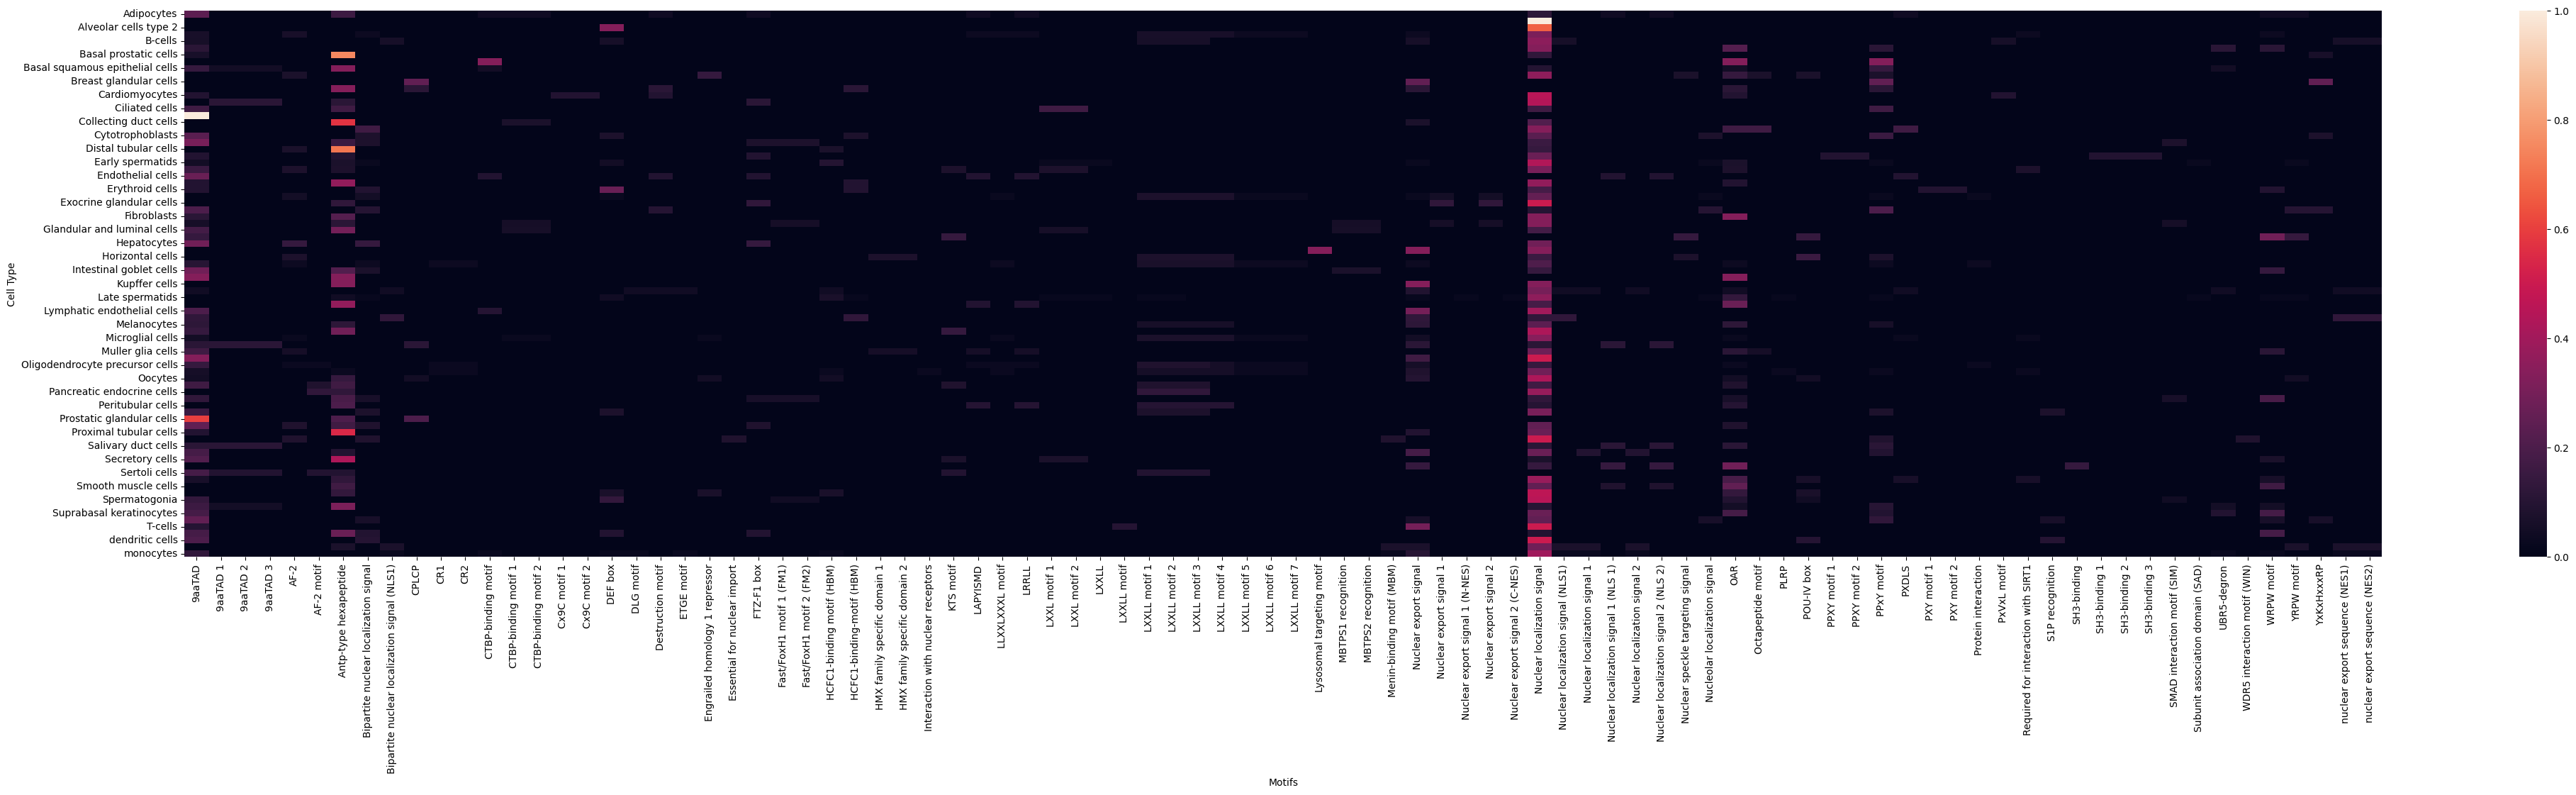

In [66]:
plt.figure(figsize=(50, 10))
sns.heatmap(pivot)
plt.show()

### composition bias

In [43]:
tf_cellspecificity_exploded["Compositional bias"][0]

'COMPBIAS 23..48; /note="Polar residues"; /evidence="ECO:0000256|SAM:MobiDB-lite"; COMPBIAS 49..67; /note="Pro residues"; /evidence="ECO:0000256|SAM:MobiDB-lite"; COMPBIAS 68..107; /note="Polar residues"; /evidence="ECO:0000256|SAM:MobiDB-lite"'

In [46]:
tf_compbias_df = tf_cellspecificity_exploded.set_index("Ensembl")[["Cell Type", "Compositional bias"]]
tf_compbias_df["Compositional bias"] = tf_compbias_df["Compositional bias"].apply(getmotif)
tf_compbias_df.head()

,Cell Type,Compositional bias
Ensembl,,
ENSG00000137203,Basal squamous epithelial cells,"[Polar residues, Pro residues, Polar residues]"
ENSG00000008196,Basal squamous epithelial cells,"[Polar residues, Pro residues, Polar residues]"
ENSG00000087510,Basal squamous epithelial cells,[Polar residues]
ENSG00000151379,Basal squamous epithelial cells,[Polar residues]
ENSG00000136997,Basal squamous epithelial cells,[Polar residues]


In [52]:
tf_compbias_df_pivot = tf_compbias_df.reset_index().explode("Compositional bias").pivot_table(index = "Cell Type", columns = "Compositional bias", values = "Ensembl", aggfunc = "count").fillna(0)
tf_compbias_df_pivot

Compositional bias,Acidic residues,Basic and acidic residues,Basic residues,Polar residues,Pro residues
Cell Type,,,,,
Adipocytes,2.0,14.0,3.0,40.0,19.0
Alveolar cells type 1,0.0,3.0,0.0,4.0,5.0
Alveolar cells type 2,2.0,7.0,0.0,6.0,5.0
Astrocytes,16.0,108.0,4.0,229.0,41.0
B-cells,2.0,17.0,4.0,33.0,7.0
...,...,...,...,...,...
T-cells,2.0,16.0,1.0,31.0,3.0
Undifferentiated cells,1.0,10.0,0.0,17.0,10.0
dendritic cells,6.0,27.0,2.0,56.0,8.0


In [58]:
tf_compbias_df_pivot_frac = tf_compbias_df_pivot.div(tf_compbias_df_pivot.sum(axis=1), axis=0)
tf_compbias_df_pivot_frac.head()

Compositional bias,Acidic residues,Basic and acidic residues,Basic residues,Polar residues,Pro residues
Cell Type,,,,,
Adipocytes,0.025641,0.179487,0.038462,0.512821,0.243590
Alveolar cells type 1,0.000000,0.250000,0.000000,0.333333,0.416667
Alveolar cells type 2,0.100000,0.350000,0.000000,0.300000,0.250000
Astrocytes,0.040201,0.271357,0.010050,0.575377,0.103015
B-cells,0.031746,0.269841,0.063492,0.523810,0.111111


In [78]:
tf_compbias_df_pivot_frac.sort_values("Acidic residues", ascending=False)

Compositional bias,Acidic residues,Basic and acidic residues,Basic residues,Polar residues,Pro residues
Cell Type,,,,,
Ovarian stromal cells,0.129032,0.322581,0.000000,0.338710,0.209677
Granulosa cells,0.108108,0.297297,0.027027,0.351351,0.216216
Alveolar cells type 2,0.100000,0.350000,0.000000,0.300000,0.250000
Erythroid cells,0.096774,0.290323,0.032258,0.483871,0.096774
Cytotrophoblasts,0.096154,0.288462,0.019231,0.480769,0.115385
...,...,...,...,...,...
Alveolar cells type 1,0.000000,0.250000,0.000000,0.333333,0.416667
Serous glandular cells,0.000000,0.333333,0.027778,0.500000,0.138889
Secretory cells,0.000000,0.200000,0.000000,0.466667,0.333333


In [96]:
#get for all non-specific cells

nonspecific_tf = specificity_ADRD[specificity_ADRD["RNA single cell type specificity"] == 'Low cell type specificity']
nonspecific_compbias = nonspecific_tf[["Compositional bias"]]
nonspecific_compbias["Compositional bias"] = nonspecific_tf["Compositional bias"].apply(getmotif)
nonspecific_valcounts = nonspecific_compbias.explode("Compositional bias")["Compositional bias"].value_counts()
nonspecific_valcounts = nonspecific_valcounts/sum(nonspecific_valcounts)
nonspecific_valcounts = nonspecific_valcounts.sort_index()

freq_ref = nonspecific_valcounts.to_list()

nonspecific_valcounts

/var/folders/rq/l7tf3_nx0ml2t2rb_tgxvm280000gn/T/ipykernel_56805/3119258409.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonspecific_compbias["Compositional bias"] = nonspecific_tf["Compositional bias"].apply(getmotif)


Compositional bias
Acidic residues              0.050651
Basic and acidic residues    0.354559
Basic residues               0.026049
Polar residues               0.426918
Pro residues                 0.141823
Name: count, dtype: float64

In [98]:
#chi sq 
pvals = []
for i in range(len(tf_compbias_df_pivot_frac)):
    classification = tf_compbias_df_pivot_frac.index.to_list()[i]
    pval = stat.chisquare(tf_compbias_df_pivot_frac.loc[classification], freq_ref)[1]
    pvals.append(pval)

pd.DataFrame({"Cell Type": tf_compbias_df_pivot_frac.index.to_list(), "Chi_2 PValue": pvals}).sort_values("Chi_2 PValue")

,Cell Type,Chi_2 PValue
28,Exocrine glandular cells,0.881876
1,Alveolar cells type 1,0.956089
13,Cholangiocytes,0.971657
39,Ionocytes,0.975676
38,Intestinal goblet cells,0.979555
...,...,...
9,Bipolar cells,0.999933
49,Mucus glandular cells,0.999980
36,Horizontal cells,0.999988
71,Spermatocytes,0.999996


<Figure size 400x1500 with 0 Axes>

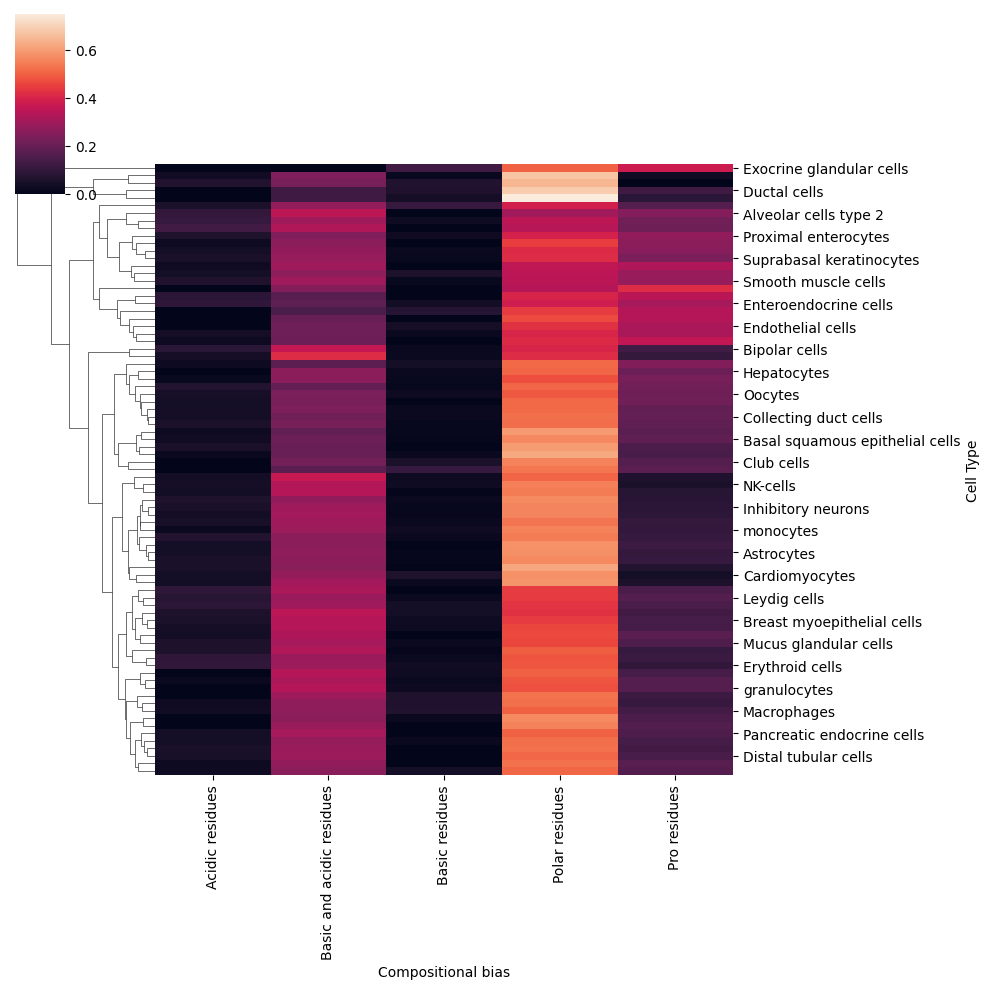

In [76]:
plt.figure(figsize=(4, 15))
sns.clustermap(tf_compbias_df_pivot_frac, col_cluster=False)
plt.show()

In [117]:
tf_compbias_df_pivot_frac.T.corr().reset_index()

Cell Type,Cell Type,Adipocytes,Alveolar cells type 1,Alveolar cells type 2,Astrocytes,B-cells,Basal keratinocytes,Basal prostatic cells,Basal respiratory cells,Basal squamous epithelial cells,...,Spermatocytes,Spermatogonia,Squamous epithelial cells,Suprabasal keratinocytes,Syncytiotrophoblasts,T-cells,Undifferentiated cells,dendritic cells,granulocytes,monocytes
0,Adipocytes,1.000000,0.772400,0.694350,0.923456,0.917790,0.908396,0.983354,0.913898,0.984680,...,0.871919,0.958885,0.977828,0.934445,0.917415,0.877954,0.957228,0.898712,0.901908,0.913435
1,Alveolar cells type 1,0.772400,1.000000,0.819436,0.573741,0.567656,0.732052,0.661360,0.601489,0.686405,...,0.642662,0.678591,0.715337,0.836167,0.559509,0.502060,0.869694,0.520437,0.712831,0.578184
2,Alveolar cells type 2,0.694350,0.819436,1.000000,0.716848,0.697864,0.879651,0.667762,0.728897,0.704783,...,0.842646,0.759526,0.762516,0.900368,0.712850,0.696100,0.870521,0.692581,0.851329,0.727480
3,Astrocytes,0.923456,0.573741,0.716848,1.000000,0.994621,0.958952,0.971026,0.986279,0.974424,...,0.967806,0.988994,0.979491,0.919849,0.999240,0.993917,0.902751,0.997780,0.957476,0.996661
4,B-cells,0.917790,0.567656,0.697864,0.994621,1.000000,0.953997,0.963052,0.996705,0.965534,...,0.968436,0.988863,0.972268,0.911660,0.990288,0.992511,0.894285,0.991366,0.963832,0.998656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,T-cells,0.877954,0.502060,0.696100,0.993917,0.992511,0.946064,0.941089,0.984718,0.944466,...,0.968991,0.972267,0.952893,0.889098,0.993386,1.000000,0.861727,0.997555,0.949983,0.994910
77,Undifferentiated cells,0.957228,0.869694,0.870521,0.902751,0.894285,0.963422,0.928767,0.906636,0.944700,...,0.921525,0.949714,0.963828,0.994043,0.895536,0.861727,1.000000,0.873937,0.950254,0.902233
78,dendritic cells,0.898712,0.520437,0.692581,0.997780,0.991366,0.945364,0.957897,0.980095,0.960245,...,0.961592,0.977162,0.964420,0.895813,0.998540,0.997555,0.873937,1.000000,0.943905,0.993685
79,granulocytes,0.901908,0.712831,0.851329,0.957476,0.963832,0.993861,0.918045,0.978438,0.933147,...,0.992775,0.976874,0.961180,0.972372,0.949385,0.949983,0.950254,0.943905,1.000000,0.970944


In [41]:
unstacked = pd.DataFrame(pivot.unstack()).sort_values(0, ascending=False)
unstacked.head()

0
Motifs                      Cell Type                      
9aaTAD                      Club cells             1.000000
Nuclear localization signal Alveolar cells type 1  1.000000
Antp-type hexapeptide       Basal prostatic cells  0.750000
                            Distal tubular cells   0.714286
Nuclear localization signal Alveolar cells type 2  0.666667

In [341]:
pivot.loc["Excitatory neurons"].sort_values(ascending=False)


Motifs
Nuclear localization signal       0.256410
LXXLL motif 4                     0.076923
LXXLL motif 1                     0.076923
LXXLL motif 2                     0.076923
LXXLL motif 3                     0.076923
                                    ...   
HMX family specific domain 1      0.000000
HCFC1-binding-motif (HBM)         0.000000
HCFC1-binding motif (HBM)         0.000000
Fast/FoxH1 motif 2 (FM2)          0.000000
nuclear export sequence (NES2)    0.000000
Name: Excitatory neurons, Length: 90, dtype: float64

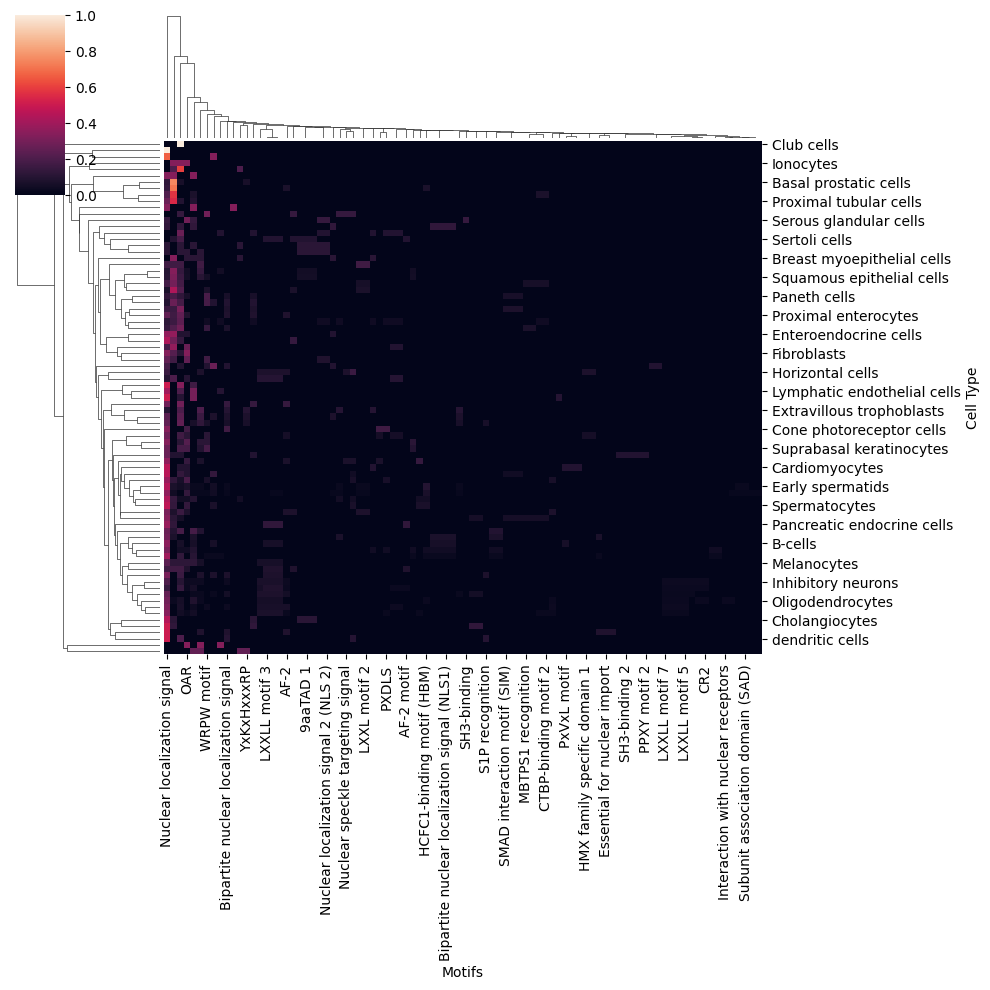

In [317]:
sns.clustermap(pivot)

In [241]:
#Sequence data from Uniprot Mapper

---

## AD and RD counts vs expression

/var/folders/rq/l7tf3_nx0ml2t2rb_tgxvm280000gn/T/ipykernel_48419/3987853233.py:1: FutureWarning: The provided callable <function mean at 0x107bcf7e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'mean' instead.
  x = scRNA_clustered_merged[["Agglomerative Cluster", "classification", "TAU score - Single Cell Type"]].pivot_table(index = "Agglomerative Cluster", columns = "classification", values = "TAU score - Single Cell Type", aggfunc = np.mean)


<Axes: xlabel='classification', ylabel='Agglomerative Cluster'>

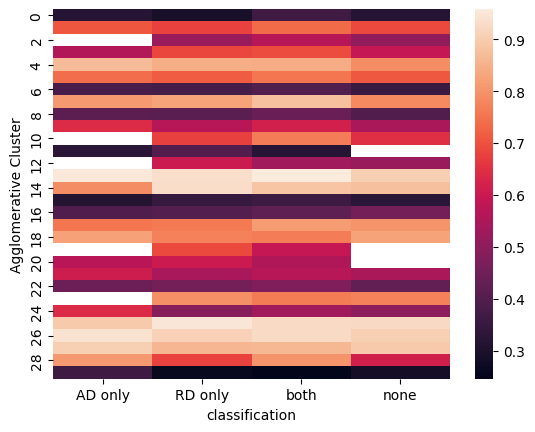

In [108]:
x = scRNA_clustered_merged[["Agglomerative Cluster", "classification", "TAU score - Single Cell Type"]].pivot_table(index = "Agglomerative Cluster", columns = "classification", values = "TAU score - Single Cell Type", aggfunc = np.mean)
sns.heatmap(x)

<Axes: xlabel='TAU score - Single Cell Type', ylabel='TAU score - Tissue'>

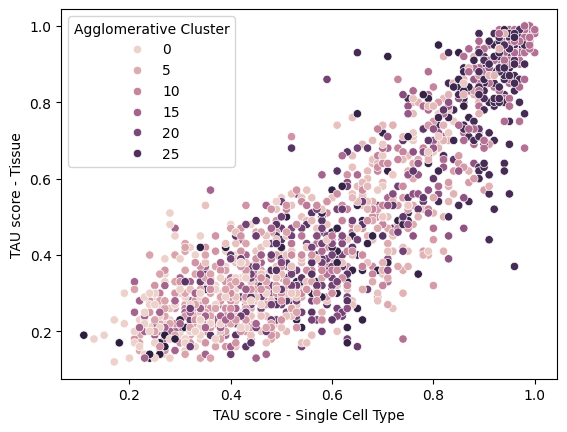

In [92]:
sns.scatterplot(scRNA_clustered_merged, x = "TAU score - Single Cell Type", y = "TAU score - Tissue", hue = "Agglomerative Cluster")

In [70]:
scRNA_clustered_merged.pivot_table(index="Agglomerative Cluster", columns="num ADs", values="TAU score - Single Cell Type", aggfunc=np.mean)

/var/folders/rq/l7tf3_nx0ml2t2rb_tgxvm280000gn/T/ipykernel_48419/2574803880.py:1: FutureWarning: The provided callable <function mean at 0x107bcf7e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'mean' instead.
  scRNA_clustered_merged.pivot_table(index="Agglomerative Cluster", columns="num ADs", values="TAU score - Single Cell Type", aggfunc=np.mean)


num ADs,0,1,2,3,4
Agglomerative Cluster,,,,,
0,0.298378,0.364242,0.311667,0.425000,NaN
1,0.682308,0.724167,0.730000,NaN,NaN
2,0.512817,0.570769,0.550000,0.570000,NaN
3,0.655000,0.683077,0.692500,NaN,NaN
4,0.817593,0.855000,0.790000,NaN,NaN
5,0.714545,0.755714,0.730000,0.760000,NaN
6,0.372326,0.392083,0.400000,0.403333,NaN
7,0.801714,0.853333,0.875000,0.890000,NaN
8,0.405114,0.433913,0.446000,NaN,0.35


In [88]:
merged_selected = scRNA_clustered_merged[["Agglomerative Cluster", "num ADs", "num RDs", "TAU score - Single Cell Type", "TAU score - Tissue"]]
merged_selected  = merged_selected.groupby("Agglomerative Cluster").agg(np.mean)
merged_selected.head()

/var/folders/rq/l7tf3_nx0ml2t2rb_tgxvm280000gn/T/ipykernel_48419/1304315517.py:2: FutureWarning: The provided callable <function mean at 0x107bcf7e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'mean' instead.
  merged_selected  = merged_selected.groupby("Agglomerative Cluster").agg(np.mean)


,num ADs,num RDs,TAU score - Single Cell Type,TAU score - Tissue
Agglomerative Cluster,,,,
0,0.443478,0.800000,0.320174,0.271217
1,0.774194,0.645161,0.707742,0.588710
2,0.138365,0.484277,0.518616,0.360755
3,0.636364,0.818182,0.670606,0.596061
4,0.131148,0.524590,0.820820,0.679508


<Axes: xlabel='num ADs', ylabel='num RDs'>

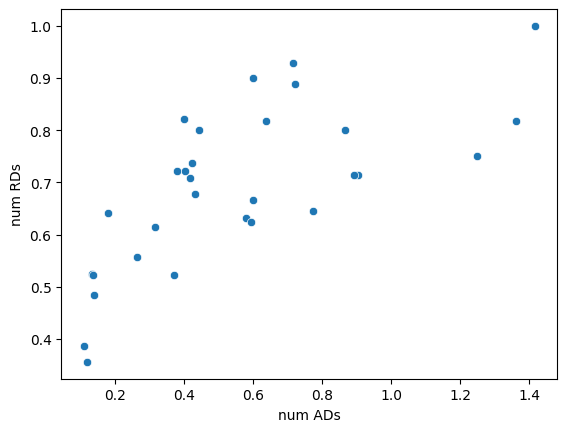

In [87]:
sns.scatterplot(merged_selected, x = "num ADs", y = "num RDs")

<Axes: xlabel='Agglomerative Cluster', ylabel='num ADs'>

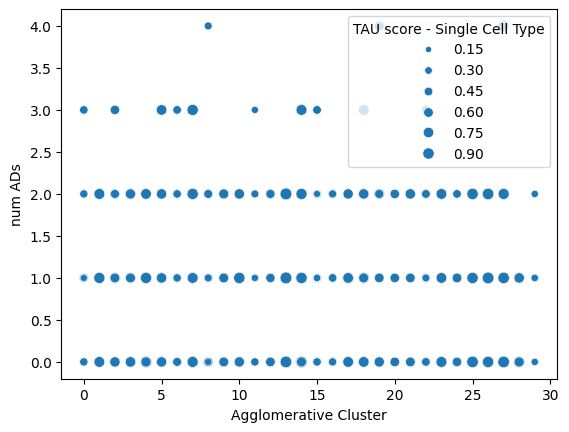

In [73]:
sns.scatterplot(scRNA_clustered_merged, x = "Agglomerative Cluster", y = "num ADs", size = "TAU score - Single Cell Type")

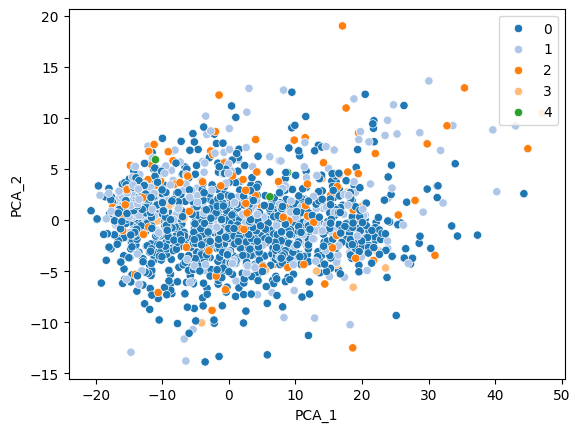

In [119]:
sns.scatterplot(scRNA_clustered_merged, x = "PCA_1", y = "PCA_2", hue = "num ADs", palette="tab20")
plt.legend(loc="upper right")


<Axes: xlabel='PCA_1', ylabel='PCA_2'>

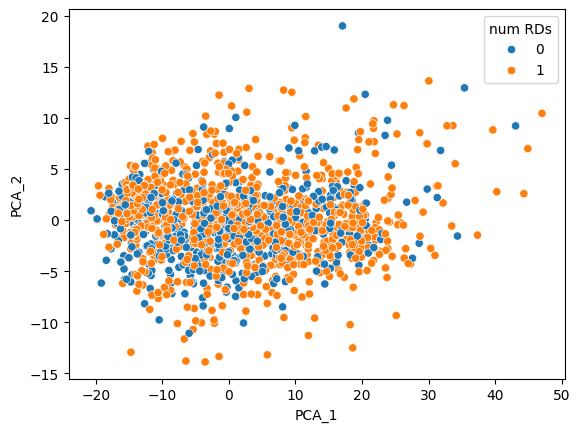

In [58]:
sns.scatterplot(scRNA_clustered_merged, x = "PCA_1", y = "PCA_2", hue = "num RDs")

<Axes: xlabel='PCA_1', ylabel='PCA_2'>

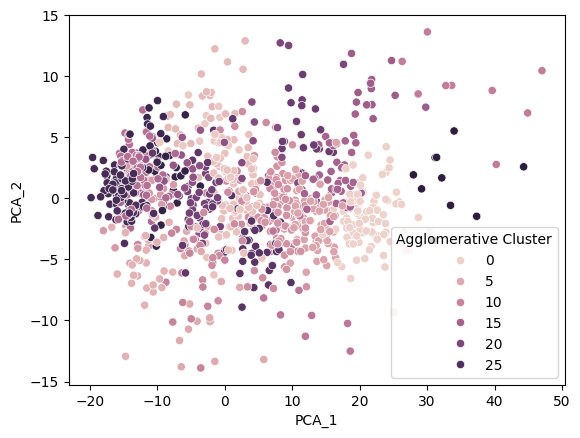

In [64]:
sns.scatterplot(scRNA_clustered_merged[scRNA_clustered_merged["num RDs"] > 0], x = "PCA_1", y = "PCA_2", hue = "Agglomerative Cluster")

In [ ]:
scRNA_clustered_merged.head()

,PCA_1,PCA_2,Mean Shift Cluster,Agglomerative Cluster,Gene,From,num ADs,num RDs
0,-0.687114,5.728895,16,1,TFAP2A,ENSG00000137203,1,0
9,-7.623561,0.649320,0,28,TFAP2B,ENSG00000008196,1,1
11,-0.728695,6.624925,0,1,TFAP2C,ENSG00000087510,1,1
13,-13.374526,4.461103,0,13,TFAP2D,ENSG00000008197,1,0
14,-15.784383,-3.493791,0,4,TFAP2E,ENSG00000116819,0,0


In [61]:
tf_specificity.loc[scRNA_clustered_merged[scRNA_clustered_merged["num ADs"] == 3]["Gene"]]

,Unnamed: 0,Ensembl,RNA tissue specificity,RNA tissue distribution,RNA tissue specificity score,RNA tissue specific nTPM,RNA single cell type specificity,RNA single cell type distribution,RNA single cell type specificity score,RNA single cell type specific nTPM,RNA single nuclei brain specificity,RNA single nuclei brain distribution,RNA single nuclei brain specificity score,RNA single nuclei brain specific nTPM,TAU score - Tissue,TAU score - Blood,TAU score - Brain,TAU score - Single Cell Type,TAU score - Single nuclei brain
Gene,,,,,,,,,,,,,,,,,,,
AHR,0,ENSG00000106546,Low tissue specificity,Detected in all,NaN,NaN,Cell type enhanced,Detected in many,NaN,"{'granulocytes': '187.3', 'Langerhans cells': ...",Cell type enhanced,Detected in many,NaN,{'hippocampal dentate gyrus': '46.1'},0.36,0.58,0.18,0.48,0.49
NCOA1,0,ENSG00000084676,Low tissue specificity,Detected in all,NaN,NaN,Cell type enhanced,Detected in all,NaN,"{'Astrocytes': '443.4', 'Excitatory neurons': ...",Low cell type specificity,Detected in all,NaN,NaN,0.24,0.44,0.06,0.43,0.11
NCOA2,0,ENSG00000140396,Low tissue specificity,Detected in all,NaN,NaN,Cell type enhanced,Detected in all,NaN,"{'Astrocytes': '153.3', 'Excitatory neurons': ...",Low cell type specificity,Detected in all,NaN,NaN,0.26,0.45,0.06,0.44,0.11
TFE3,0,ENSG00000068323,Low tissue specificity,Detected in all,NaN,NaN,Low cell type specificity,Detected in many,NaN,NaN,Low cell type specificity,Detected in all,NaN,NaN,0.13,0.68,0.09,0.34,0.21
CREB3,0,ENSG00000107175,Low tissue specificity,Detected in all,NaN,NaN,Cell type enhanced,Detected in all,NaN,{'Late spermatids': '427.5'},Low cell type specificity,Detected in all,NaN,NaN,0.13,0.11,0.04,0.45,0.21
FOS,0,ENSG00000170345,Low tissue specificity,Detected in all,NaN,NaN,Low cell type specificity,Detected in all,NaN,NaN,Group enriched,Detected in all,4.0,"{'astrocyte': '259.9', 'central nervous system...",0.20,0.73,0.14,0.26,0.65
ZFHX4,0,ENSG00000091656,Low tissue specificity,Detected in many,NaN,NaN,Cell type enhanced,Detected in many,NaN,"{'Astrocytes': '340.0', 'Bipolar cells': '80.0...",Cell type enhanced,Detected in many,NaN,{'midbrain-derived inhibitory': '455.0'},0.60,Not detected,0.16,0.76,0.46
ETV5,0,ENSG00000244405,Low tissue specificity,Detected in all,NaN,NaN,Cell type enhanced,Detected in many,NaN,"{'Excitatory neurons': '90.8', 'Oligodendrocyt...",Cell type enhanced,Detected in all,NaN,{'central nervous system macrophage': '275.6'},0.39,Not detected,0.10,0.57,0.36
GATA4,0,ENSG00000136574,Tissue enhanced,Detected in some,NaN,"{'heart muscle': '84.3', 'ovary': '87.8', 'pan...",Cell type enhanced,Detected in some,NaN,"{'Cardiomyocytes': '35.4', 'Gastric mucus-secr...",Not detected,Not detected,NaN,NaN,0.81,Not detected,Not detected,0.85,Not detected


---

## AD only analysis

In [140]:
ADs_only = TFsmapped_reviewed[TFsmapped_reviewed["classification"] == "AD only"]
ADs_only.head()

,From,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,Tissue specificity,Motif,Protein families,Compositional bias,Sequence similarities,Bgee,ExpressionAtlas,num ADs,num RDs,classification,gencodeId
0,ENSG00000137203,P05549,reviewed,AP2A_HUMAN,Transcription factor AP-2-alpha (AP2-alpha) (A...,TFAP2A AP2TF TFAP2,Homo sapiens (Human),437,NaN,"MOTIF 57..62; /note=""PPxY motif""",AP-2 family,"COMPBIAS 23..48; /note=""Polar residues""; /evid...",SIMILARITY: Belongs to the AP-2 family. {ECO:0...,ENSG00000137203; Expressed in upper leg skin a...,P05549; baseline and differential.;,1,0,AD only,ENSG00000137203.10
13,ENSG00000008197,Q7Z6R9,reviewed,AP2D_HUMAN,Transcription factor AP-2-delta (AP2-delta) (A...,TFAP2D TFAP2BL1,Homo sapiens (Human),452,"TISSUE SPECIFICITY: Highly expressed in brain,...",NaN,AP-2 family,"COMPBIAS 433..452; /note=""Basic and acidic res...",SIMILARITY: Belongs to the AP-2 family. {ECO:0...,ENSG00000008197; Expressed in oocyte and 23 ot...,NaN,1,0,AD only,ENSG00000008197.4
84,ENSG00000137309,P17096,reviewed,HMGA1_HUMAN,High mobility group protein HMG-I/HMG-Y (HMG-I...,HMGA1 HMGIY,Homo sapiens (Human),107,NaN,NaN,HMGA family,"COMPBIAS 1..15; /note=""Polar residues""; /evide...",SIMILARITY: Belongs to the HMGA family. {ECO:0...,ENSG00000137309; Expressed in lower esophagus ...,P17096; baseline and differential.;,1,0,AD only,ENSG00000137309.19
88,ENSG00000149948,P52926,reviewed,HMGA2_HUMAN,High mobility group protein HMGI-C (High mobil...,HMGA2 HMGIC,Homo sapiens (Human),109,NaN,NaN,HMGA family,"COMPBIAS 1..20; /note=""Polar residues""; /evide...",SIMILARITY: Belongs to the HMGA family. {ECO:0...,ENSG00000149948; Expressed in sural nerve and ...,P52926; baseline and differential.;,1,0,AD only,ENSG00000149948.13
236,ENSG00000124440,Q9Y2N7,reviewed,HIF3A_HUMAN,Hypoxia-inducible factor 3-alpha (HIF-3-alpha)...,HIF3A BHLHE17 MOP7 PASD7,Homo sapiens (Human),669,TISSUE SPECIFICITY: Expressed in vascular cell...,"MOTIF 414..418; /note=""LRRLL""; MOTIF 490..497;...",NaN,"COMPBIAS 10..27; /note=""Basic and acidic resid...",NaN,ENSG00000124440; Expressed in mucosa of stomac...,Q9Y2N7; baseline and differential.;,1,0,AD only,ENSG00000124440.15


In [143]:
ADs_cellspecific = tf_cellspecificity_exploded[tf_cellspecificity_exploded["classification"] == "AD only"]
ADs_cellspecific.head()

,Cell Type,Genes,Ensembl,RNA tissue specificity,RNA tissue distribution,RNA tissue specificity score,RNA tissue specific nTPM,RNA single cell type specificity,RNA single cell type distribution,RNA single cell type specificity score,...,Motif,Protein families,Compositional bias,Sequence similarities,Bgee,ExpressionAtlas,num ADs,num RDs,classification,gencodeId
0,Basal squamous epithelial cells,ENSG00000137203,ENSG00000137203,Tissue enhanced,Detected in many,NaN,"{'breast': '31.9', 'skin 1': '64.9'}",Cell type enhanced,Detected in many,NaN,...,"MOTIF 57..62; /note=""PPxY motif""",AP-2 family,"COMPBIAS 23..48; /note=""Polar residues""; /evid...",SIMILARITY: Belongs to the AP-2 family. {ECO:0...,ENSG00000137203; Expressed in upper leg skin a...,P05549; baseline and differential.;,1.0,0.0,AD only,ENSG00000137203.10
8,Basal squamous epithelial cells,ENSG00000108924,ENSG00000108924,Tissue enhanced,Detected in many,NaN,{'liver': '118.7'},Cell type enhanced,Detected in many,NaN,...,NaN,"BZIP family, PAR subfamily","COMPBIAS 37..54; /note=""Basic and acidic resid...",SIMILARITY: Belongs to the bZIP family. PAR su...,ENSG00000108924; Expressed in calcaneal tendon...,Q16534; baseline and differential.;,1.0,0.0,AD only,ENSG00000108924.13
28,Basal squamous epithelial cells,ENSG00000157557,ENSG00000157557,Low tissue specificity,Detected in all,NaN,NaN,Cell type enhanced,Detected in many,NaN,...,NaN,ETS family,NaN,SIMILARITY: Belongs to the ETS family. {ECO:00...,ENSG00000157557; Expressed in skin of abdomen ...,P15036; baseline and differential.;,1.0,0.0,AD only,ENSG00000157557.11
36,Basal squamous epithelial cells,ENSG00000129194,ENSG00000129194,Tissue enhanced,Detected in many,NaN,"{'esophagus': '84.9', 'skin 1': '46.7'}",Group enriched,Detected in many,4.0,...,NaN,NaN,"COMPBIAS 1..32; /note=""Polar residues""; /evide...",NaN,ENSG00000129194; Expressed in lower esophagus ...,NaN,1.0,0.0,AD only,ENSG00000129194.7
37,Basal squamous epithelial cells,ENSG00000181449,ENSG00000181449,Tissue enhanced,Detected in many,NaN,"{'brain': '71.3', 'esophagus': '23.8'}",Cell type enhanced,Detected in many,NaN,...,"MOTIF 272..280; /note=""9aaTAD""; /evidence=""ECO...",NaN,"COMPBIAS 10..33; /note=""Polar residues""; /evid...",NaN,ENSG00000181449; Expressed in ventricular zone...,P48431; baseline and differential.;,1.0,0.0,AD only,ENSG00000181449.3


In [157]:
AD_specific_motif = ADs_cellspecific.set_index("Ensembl")[["Cell Type", "Motif"]]
AD_specific_motif["Motif"] = AD_specific_motif["Motif"].apply(getmotif)
AD_cell_specific_motifs = AD_specific_motif.explode("Motif").reset_index().pivot_table(index="Cell Type", columns="Motif", values="Ensembl", aggfunc="count").fillna(0)
#get fraction
AD_cell_specific_motifs = AD_cell_specific_motifs.div(ADs_cellspecific.groupby("Cell Type").agg(len)[["Genes"]].sum(axis=1), axis=0).fillna(0)

AD_cell_specific_motifs.head()

Motif,9aaTAD,Antp-type hexapeptide,Bipartite nuclear localization signal,DEF box,LAPYISMD,LRRLL,LXXLL motif 1,LXXLL motif 2,LXXLL motif 3,LXXLL motif 4,Nuclear export signal 1 (N-NES),Nuclear export signal 2 (C-NES),Nuclear localization signal,Nuclear speckle targeting signal,POU-IV box,PPxY motif,Subunit association domain (SAD),UBR5-degron
Cell Type,,,,,,,,,,,,,,,,,,
Adipocytes,0.5,0.00,0.0,0.0,0.25,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Alveolar cells type 2,0.0,0.00,0.0,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Astrocytes,0.0,0.00,0.2,0.0,0.20,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Basal keratinocytes,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Basal prostatic cells,0.0,0.75,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Figure size 500x2500 with 0 Axes>

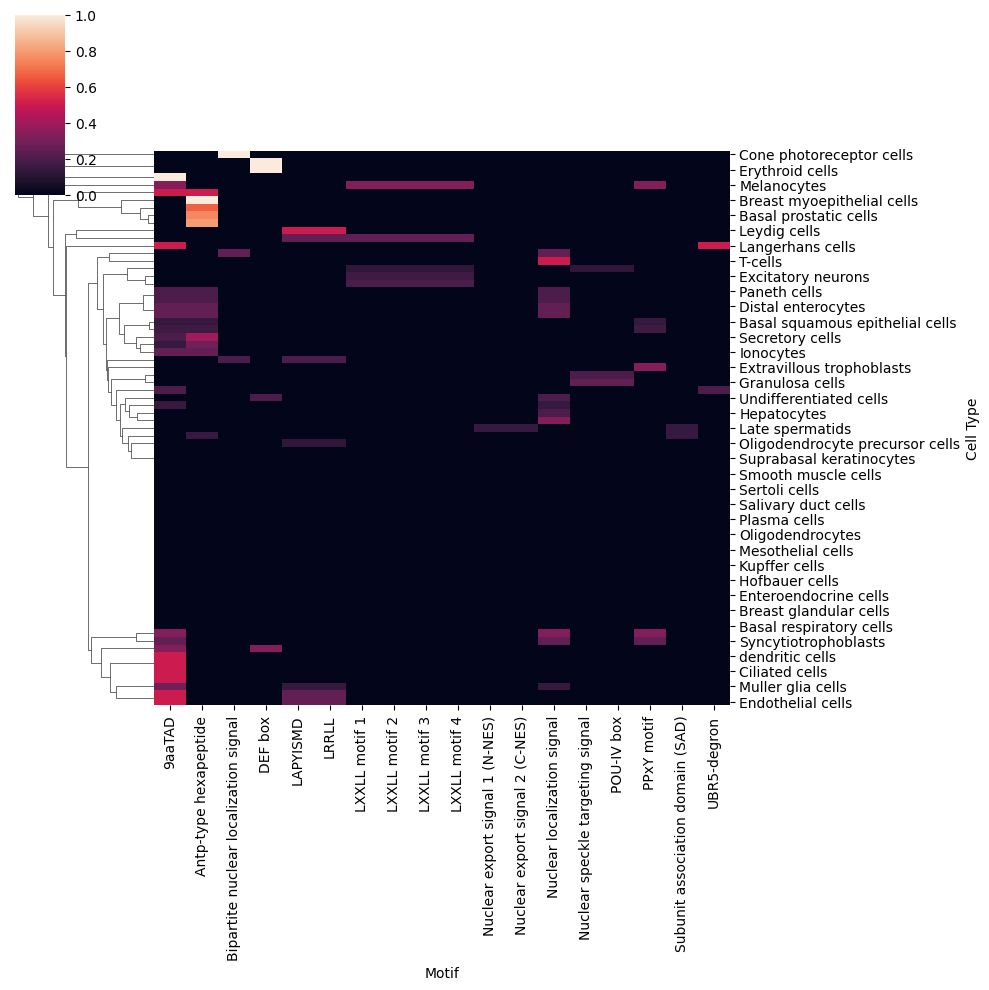

In [167]:
plt.figure(figsize=(5, 25))
sns.clustermap(AD_cell_specific_motifs, col_cluster=False)

<Figure size 500x1500 with 0 Axes>

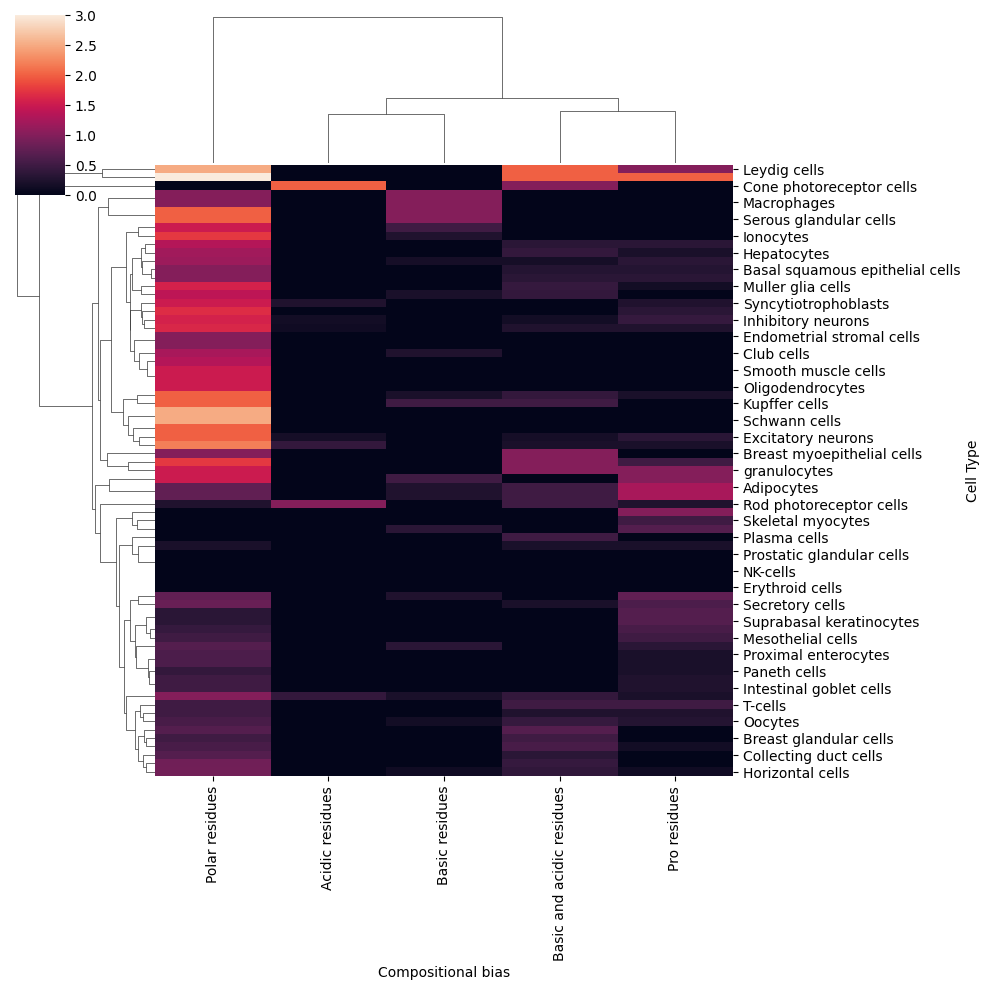

In [172]:
AD_specific_motif = ADs_cellspecific.set_index("Ensembl")[["Cell Type", "Compositional bias"]]
AD_specific_motif["Compositional bias"] = AD_specific_motif[ "Compositional bias"].apply(getmotif)
AD_cell_specific_motifs = AD_specific_motif.explode("Compositional bias").reset_index().pivot_table(index="Cell Type", columns= "Compositional bias", values="Ensembl", aggfunc="count").fillna(0)
#get fraction
AD_cell_specific_motifs = AD_cell_specific_motifs.div(ADs_cellspecific.groupby("Cell Type").agg(len)[["Genes"]].sum(axis=1), axis=0).fillna(0)

plt.figure(figsize=(5,15))
sns.clustermap(AD_cell_specific_motifs)